In [26]:
import numpy as np
import matplotlib.pyplot as plt

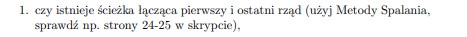

In [34]:
L = 50
p = 0.6
net = np.zeros((L,L))
for i in range(L):
    for j in range(L):
        r = np.random.uniform(0,1)
        if r < p:
            net[i,j] = 1
        else:
            net[i,j] = 0

In [35]:
t = 2
for i in range(L):
    if net[0, i] == 1:
        net[0,i] = 2
any_neigbhours = True
last_row_reached = False

Istnieje ścieżka łącząca pierwszy i ostatni rząd


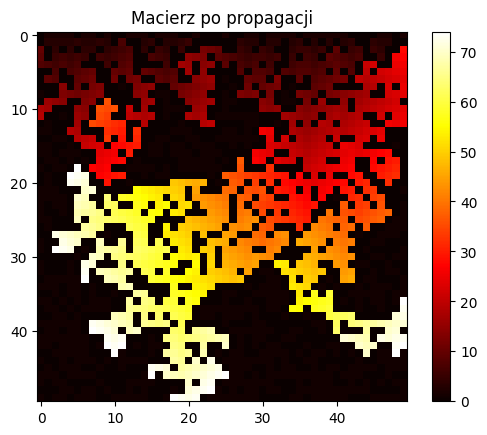

In [36]:
while any_neigbhours and not(last_row_reached):
    neigbours = 0
    for i in range(L):
        for j in range(L):
            if net[i,j] == t:
                if i - 1 >= 0:
                    if net[i - 1, j] == 1:
                        net[i - 1, j] = t + 1
                        neigbours += 1
                if i + 1 < L:
                    if net[i + 1, j] == 1:
                        net[i + 1, j] = t + 1
                        neigbours += 1
                if j - 1 >= 0:
                    if net[i, j - 1] == 1:
                        net[i, j - 1] = t + 1
                        neigbours += 1
                if j + 1 < L:
                    if net[i, j + 1] == 1:
                        net[i, j + 1] = t + 1
                        neigbours += 1
    for i in range(L):
        if t > 2:
            if net[L-1, i] == t-1:
                last_row_reached = True
    if neigbours == 0:
        any_neigbhours = False
    t += 1
if last_row_reached:
    print("Istnieje ścieżka łącząca pierwszy i ostatni rząd")
else:
    print("Nie istnieje ścieżka łącząca pierwszy i ostatni rząd")


plt.imshow(net, cmap='hot', interpolation='nearest')
plt.title('Macierz po propagacji')
plt.colorbar()
plt.show()
    


In [25]:
def cluster(L, p):
    net = np.zeros((L,L))
    for i in range(L):
        for j in range(L):
            r = np.random.uniform(0,1)
            if r < p:
                net[i,j] = 1
            else:
                net[i,j] = 0
    M_k = [1]
    k = 2
    changed_clusters = []
    for i in range(L):
        for j in range(L):
            if net[i,j] == 1:
                net[i,j] = k
                M_k.append(1)
                break
    for i in range(L):
        for j in range(L):
            if k < 0:
                for change in changed_clusters:
                    if k == change[0]:
                        k = change[1]
                        M_k[change[0] -2] = M_k[change[1]-2]          
            if i > 0 or j > 0:
                if i > 0:
                    left = net[i, j - 1] 
                else:
                    left = 0
                if j > 0:
                    top = net[i-1, j]
                else:
                    top = 0
                if left == 0 and top == 0:
                    k += 1
                    net[i,j] = k
                    M_k.append(1)
                elif 2 <= left <= k and top == 0:
                    M_k[int(left) - 2] += 1
                    net[i,j] = left
                elif 2 <= top <= k and left == 0:
                    M_k[int(top) - 2] += 1
                    net[i,j] = top
                elif 2 <= left <= k and 2 <= top <= k:
                    if left != top:
                        net[i,j] = left
                        M_k[int(left) - 2] += (M_k[int(top) - 2] + 1)
                        M_k[int(top) - 2] *= -1
                        changed_clusters.append([int(top), int(left)])
                    if left == top:
                        net[i,j] = left
                        M_k[int(left) - 2] += 1
            else:
                k += 1
                net[i,j] = k
                M_k[k-2] += 1
    return M_k
            






In [23]:
print(cluster(5, 0.5))

[10, 2, -1, 9, 1, 1, 1, 1]


<function matplotlib.pyplot.show(close=None, block=None)>

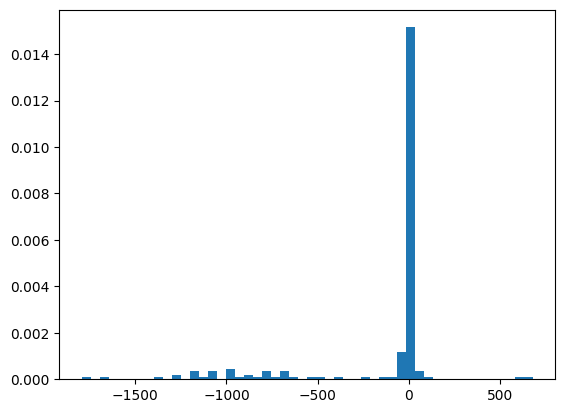

In [24]:
import matplotlib.pyplot as plt
samples = cluster(100, 0.6)
plt.hist(samples, density=True, bins = 50)
plt.show

In [37]:
def find_and_replace(label, i, j, above, left):
    row, col = np.where(label == above)
    for r, c in zip(row, col):
        label[r, c] = left
        #M_k[int(label[r, c])] = M_k[int(above)]
    return label

In [38]:
def cluster(L, p):
    net = np.zeros((L,L))
    for i in range(L):
        for j in range(L):
            r = np.random.uniform(0,1)
            if r < p:
                net[i,j] = 1
            else:
                net[i,j] = 0
    k = 2
    #M_k = {1:1}
    for i in range(L):
        for j in range(L):
            if int(net[i,j]):        
                if j > 0:
                    left = net[i, j - 1] 
                else:
                    left = 0
                if i > 0:
                    top = net[i-1, j]
                else:
                    top = 0
                if left == 0 and top == 0:
                    net[i,j] = k
                    #M_k[k] = 1
                    k += 1
                elif left != 0 and top == 0:
                    net[i,j] = left
                    #M_k[int(left)] +=  1
                elif top != 0 and left == 0:
                    net[i,j] = top
                    #M_k[int(top)] +=  1
                else:
                    #M_k[int(left)] += M_k[int(net[i,j])] + 1
                    net= find_and_replace(net, i, j, top, left)
                    net[i,j] = left
    unique, counts = np.unique(net, return_counts=True)
    dict_ = dict(zip(unique, counts))
    clusters_count = []
    for key in dict_:
        if key != 0:
            clusters_count.append(dict_[key])
    return net, clusters_count

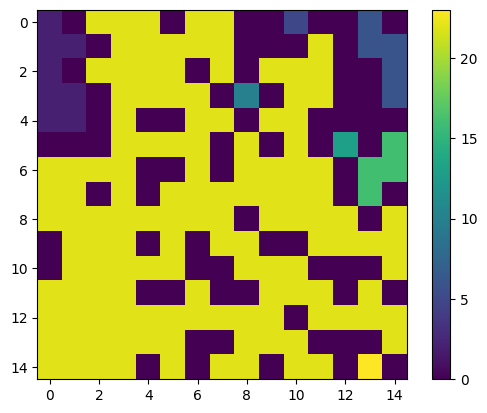

In [40]:
net, counts = cluster(15, 0.6)
plt.imshow(net)
plt.colorbar()
plt.show()

[1, 5, 1, 1, 1, 5, 1, 1, 8, 2, 1, 1, 9, 1, 17, 1, 1, 1, 2, 1, 16, 14, 3, 1, 1, 1, 21, 1, 2, 1, 2, 5, 1, 1, 1, 4, 2, 4, 8, 1, 2, 1, 1, 1, 1, 3, 1, 1, 203, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 2, 1, 2, 3, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 3, 1, 1, 18, 1, 1, 3, 1, 1, 2, 2, 2, 3, 1, 1, 1, 1, 31, 19, 1, 14, 1, 1, 18, 1, 2, 1, 1, 1, 1, 1, 11, 1, 7, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 5, 1, 26, 4, 2, 1, 7, 1, 1, 1, 7, 1, 1, 2, 3, 1, 1, 2, 1, 2, 3, 8, 1, 12, 1, 17, 1, 1, 1, 3, 4, 1, 1, 3, 1, 6, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 3, 1, 1, 4, 22, 1, 5, 1, 1, 10, 61, 2, 2, 1, 1, 1, 1, 2, 1, 6, 1, 1, 2, 1, 1, 6, 1, 1, 33, 2, 1, 1, 1, 1, 1, 1, 13, 4, 2, 41, 3, 1, 6, 1, 5, 1, 1, 1, 2, 1, 1, 3, 28, 2, 1, 1, 3, 2, 14, 2, 1, 2, 1, 1, 1, 1, 1, 1, 24, 1, 14, 3, 39, 1, 4719, 37, 24, 3, 5, 8, 77, 4, 1, 1, 1, 1, 1, 2]


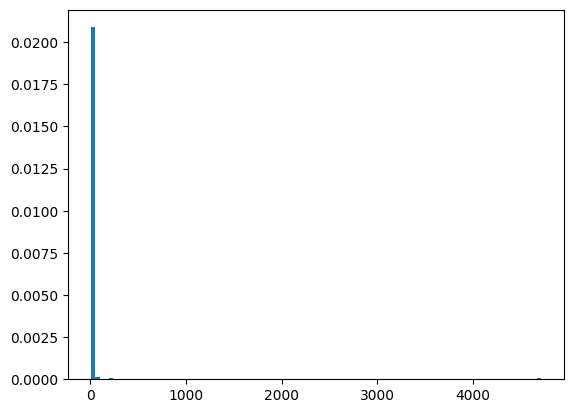

In [47]:
clusters = cluster(100,0.6)[1]
print(clusters)
plt.hist(clusters, density=True, bins= 100)
plt.show()